In [831]:
# pandas for df structures and operations for manipulating numerical tables and time series
import pandas
from pandas.plotting import scatter_matrix

import seaborn as sns

# matplotlib.pyplot for df plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.stats import zscore


# for numeric calculations
import numpy as np

# from utilities import visualize_classifier
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score


In [832]:
df = pandas.read_csv("HR-Employee-Attrition.csv")

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [833]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [834]:
print(df.shape)

(1470, 35)


In [835]:
list(df)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [836]:
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [837]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [838]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [839]:
df[df.notnull()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [840]:
df = df.dropna()

Were gonna check if the column Over18 is usefull. Sut den

In [841]:
print(df['Over18'].unique())

['Y']


In [842]:
df.drop(['Over18'], axis=1, inplace=True)

In [843]:
object_cols = df.select_dtypes(include='object').columns

# Dictionary to store the mappings for reporting
mapping_report = {}

# Replace categorical values with numeric codes
for col in object_cols:
    unique_vals = df[col].unique()
    val_to_code = {val: code for code, val in enumerate(unique_vals)}
    df[col] = df[col].map(val_to_code)
    mapping_report[col] = val_to_code

for col in mapping_report:
    print(f"\nColumn: {col}")
    for k, v in mapping_report[col].items():
        print(f"  '{k}' → {v}")



Column: Attrition
  'Yes' → 0
  'No' → 1

Column: BusinessTravel
  'Travel_Rarely' → 0
  'Travel_Frequently' → 1
  'Non-Travel' → 2

Column: Department
  'Sales' → 0
  'Research & Development' → 1
  'Human Resources' → 2

Column: EducationField
  'Life Sciences' → 0
  'Other' → 1
  'Medical' → 2
  'Marketing' → 3
  'Technical Degree' → 4
  'Human Resources' → 5

Column: Gender
  'Female' → 0
  'Male' → 1

Column: JobRole
  'Sales Executive' → 0
  'Research Scientist' → 1
  'Laboratory Technician' → 2
  'Manufacturing Director' → 3
  'Healthcare Representative' → 4
  'Manager' → 5
  'Sales Representative' → 6
  'Research Director' → 7
  'Human Resources' → 8

Column: MaritalStatus
  'Single' → 0
  'Married' → 1
  'Divorced' → 2

Column: OverTime
  'Yes' → 0
  'No' → 1


In [844]:
df.select_dtypes(include='number').skew()

Age                         0.413286
Attrition                  -1.844366
BusinessTravel              1.439006
DailyRate                  -0.003519
Department                 -0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.487091
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                     0.770149
JobSatisfaction            -0.329672
MaritalStatus               0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                   -0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
T

Rows before outlier removal: 1470
Rows after outlier removal:  1074
Total rows removed:          396

Rows removed per column:
  MonthlyIncome: 114
  TotalWorkingYears: 61
  YearsAtCompany: 27
  YearsSinceLastPromotion: 141
  NumCompaniesWorked: 39
  DistanceFromHome: 0
  JobLevel: 14


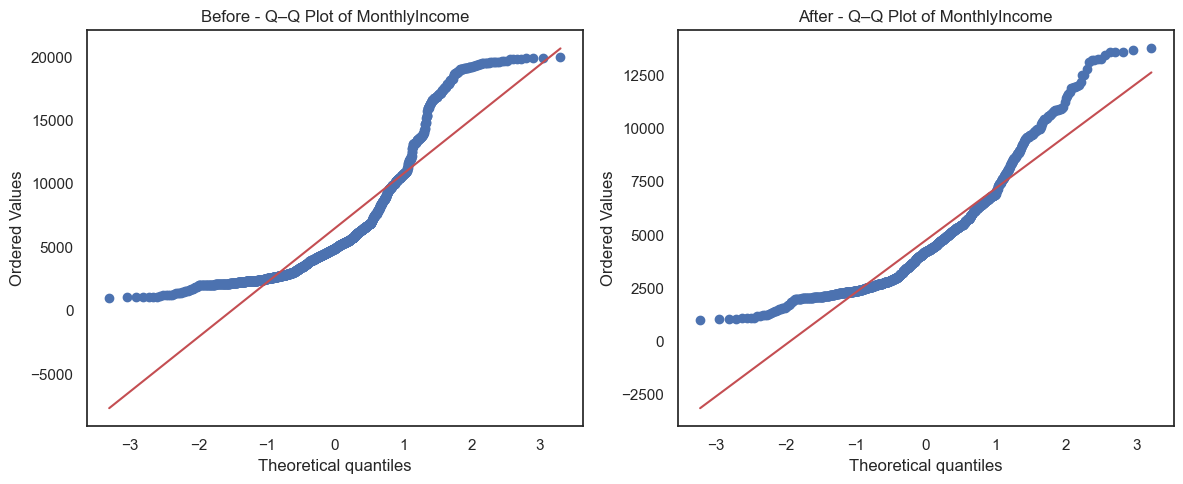

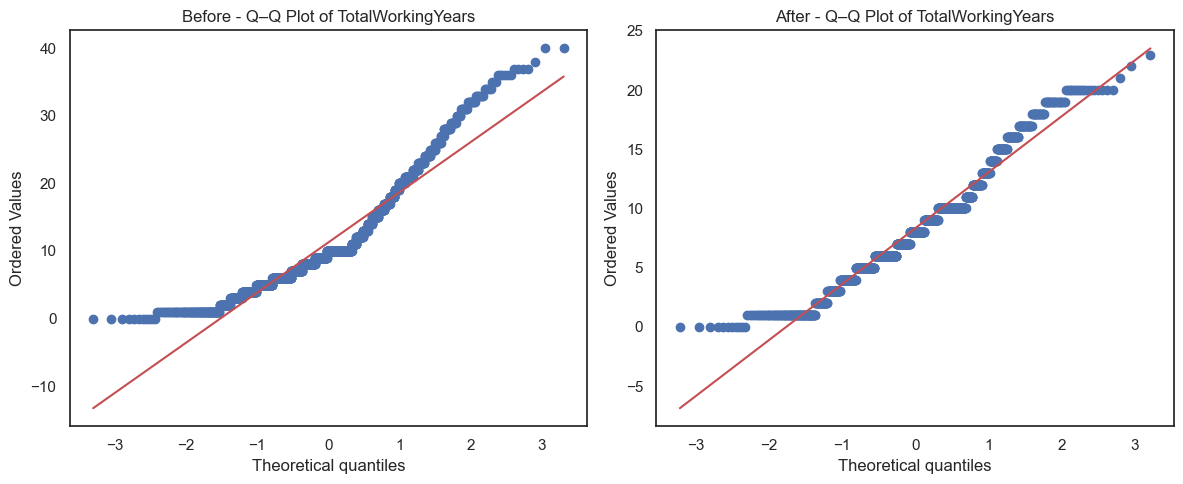

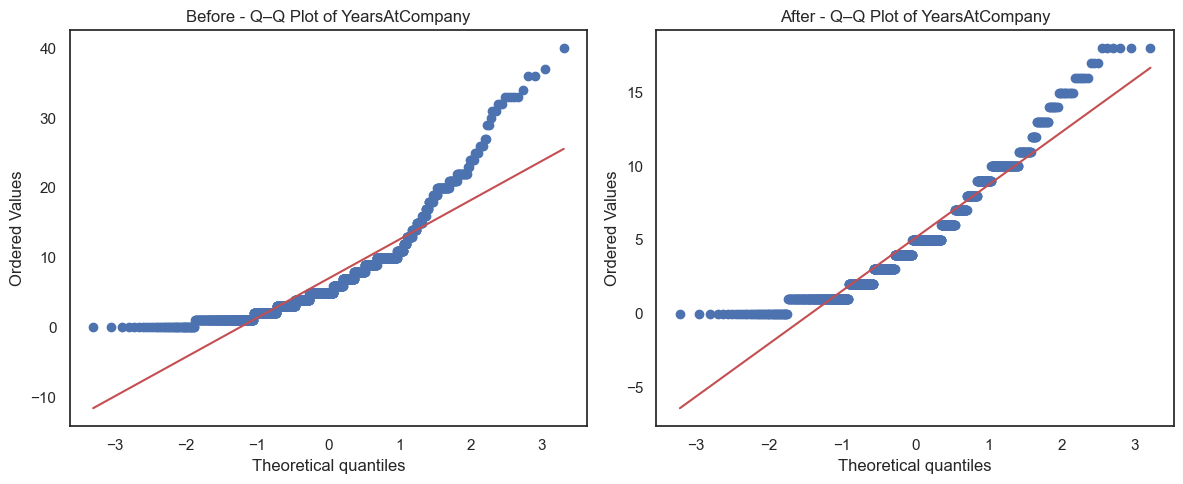

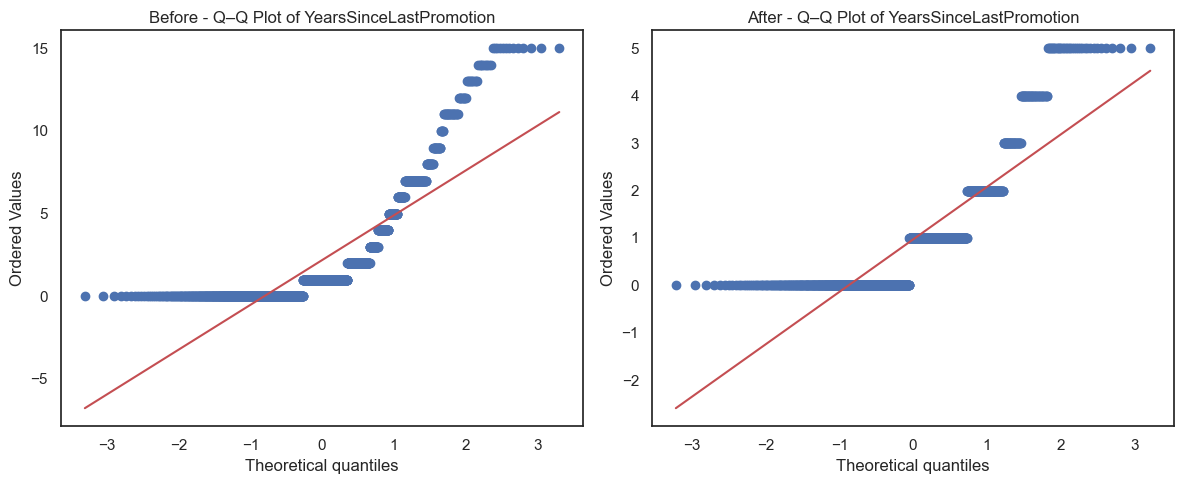

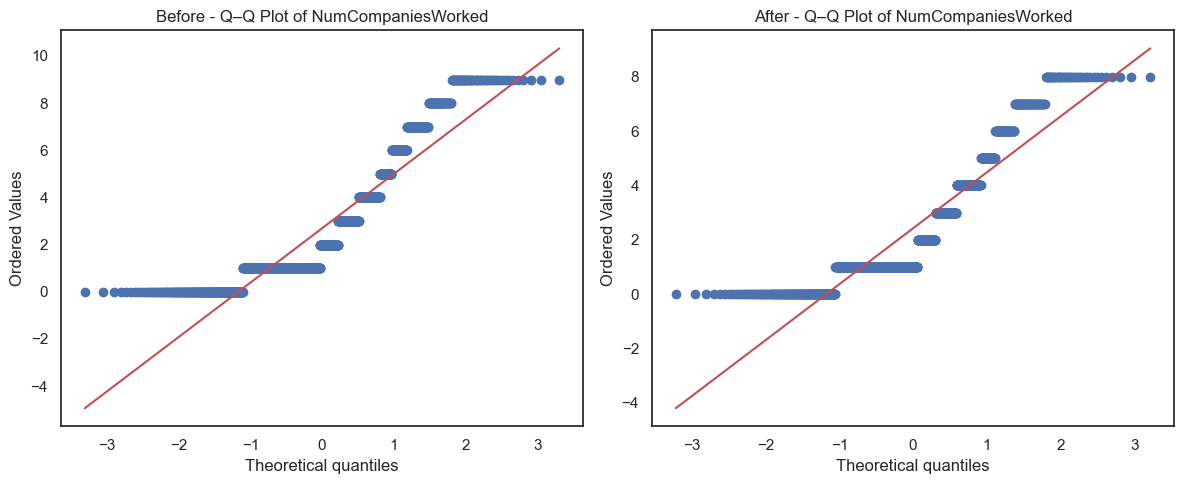

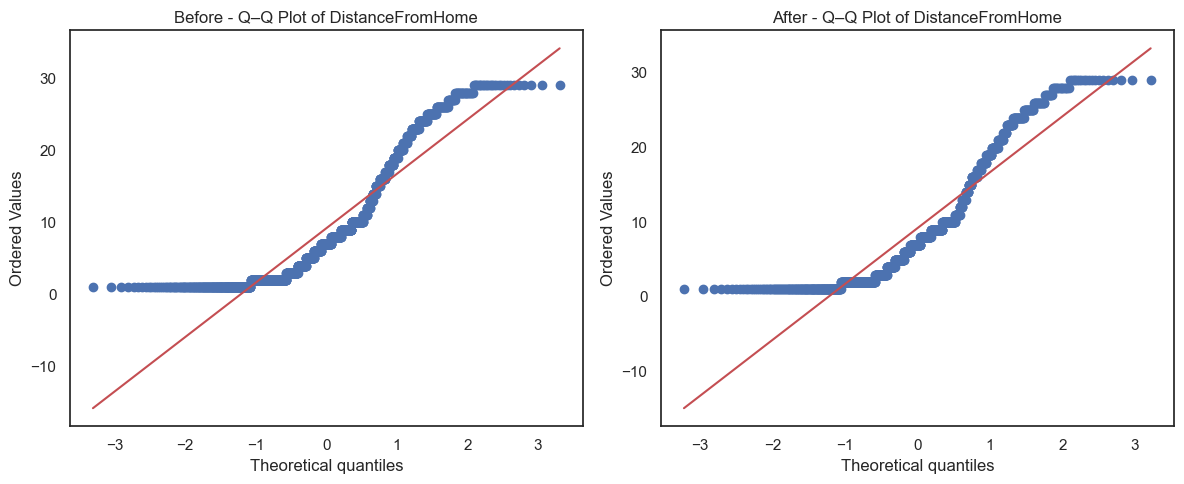

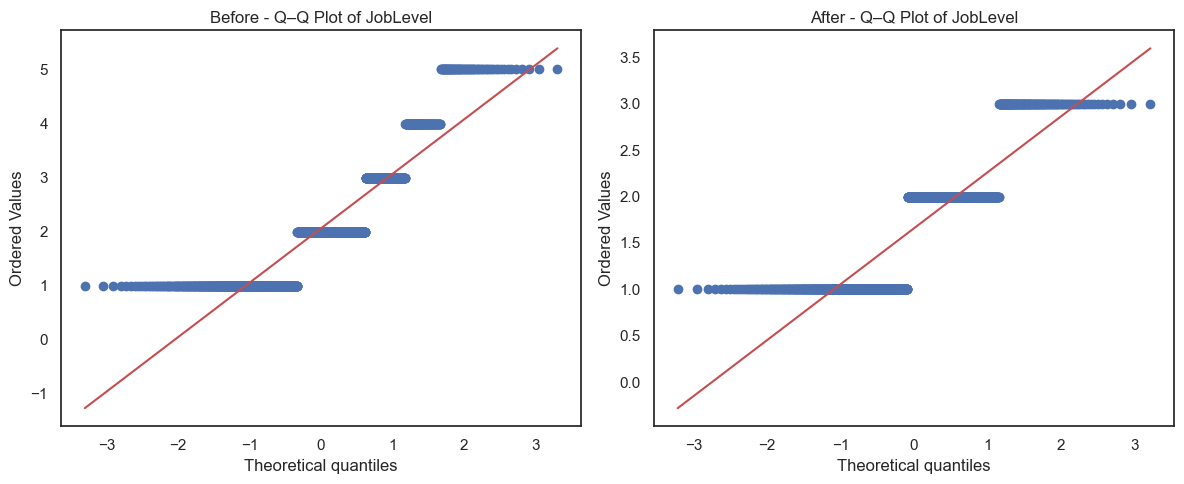

In [845]:
# Columns to apply outlier removal on (skewed numeric columns)
skewed_cols = [
    'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
    'YearsSinceLastPromotion', 'NumCompaniesWorked',
    'DistanceFromHome', 'JobLevel'
]

# Keep a copy of original df for plotting before/after
df_before = df.copy()

rows_before = len(df)
print(f"Rows before outlier removal: {rows_before}")

removed_per_column = {}

for col in skewed_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Identify outliers in current df
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    removed_per_column[col] = len(outliers)
    
    # Filter out outliers for this column
    df = df[(df[col] >= lower) & (df[col] <= upper)]

rows_after = len(df)
total_removed = rows_before - rows_after

print(f"Rows after outlier removal:  {rows_after}")
print(f"Total rows removed:          {total_removed}")
print("\nRows removed per column:")
for col, count in removed_per_column.items():
    print(f"  {col}: {count}")

# Q–Q plots to visually confirm improvement for each column
for col in skewed_cols:
    plt.figure(figsize=(12, 5))

    # Before outlier removal
    plt.subplot(1, 2, 1)
    stats.probplot(df_before[col], dist="norm", plot=plt)
    plt.title(f"Before - Q–Q Plot of {col}")

    # After outlier removal
    plt.subplot(1, 2, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"After - Q–Q Plot of {col}")

    plt.tight_layout()
    plt.show()


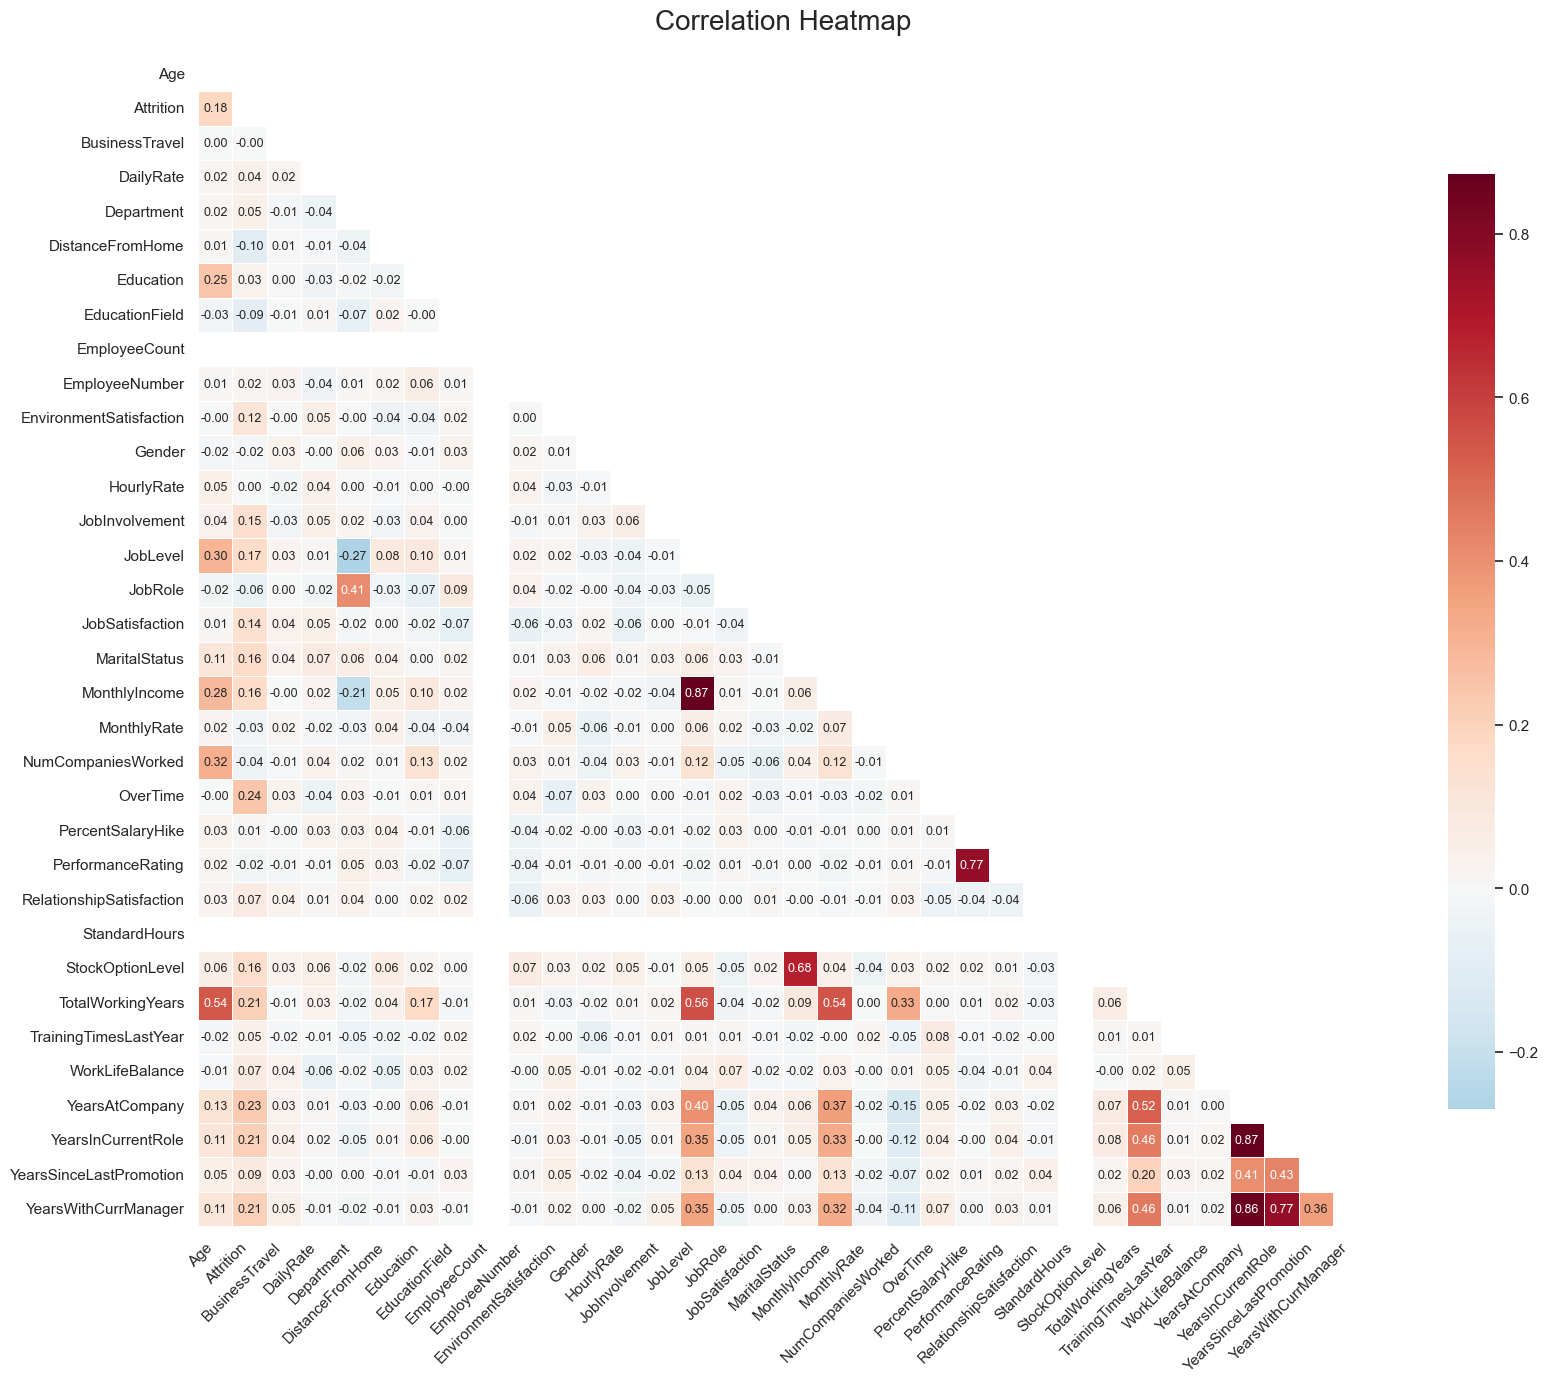

In [846]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(18, 14))
sns.set(style="white") 

heatmap = sns.heatmap(
    corr,                
    mask=mask,           
    annot=True,     
    fmt=".2f",
    cmap="RdBu_r",     
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 9},
    square=True
)

plt.title("Correlation Heatmap", fontsize=20, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

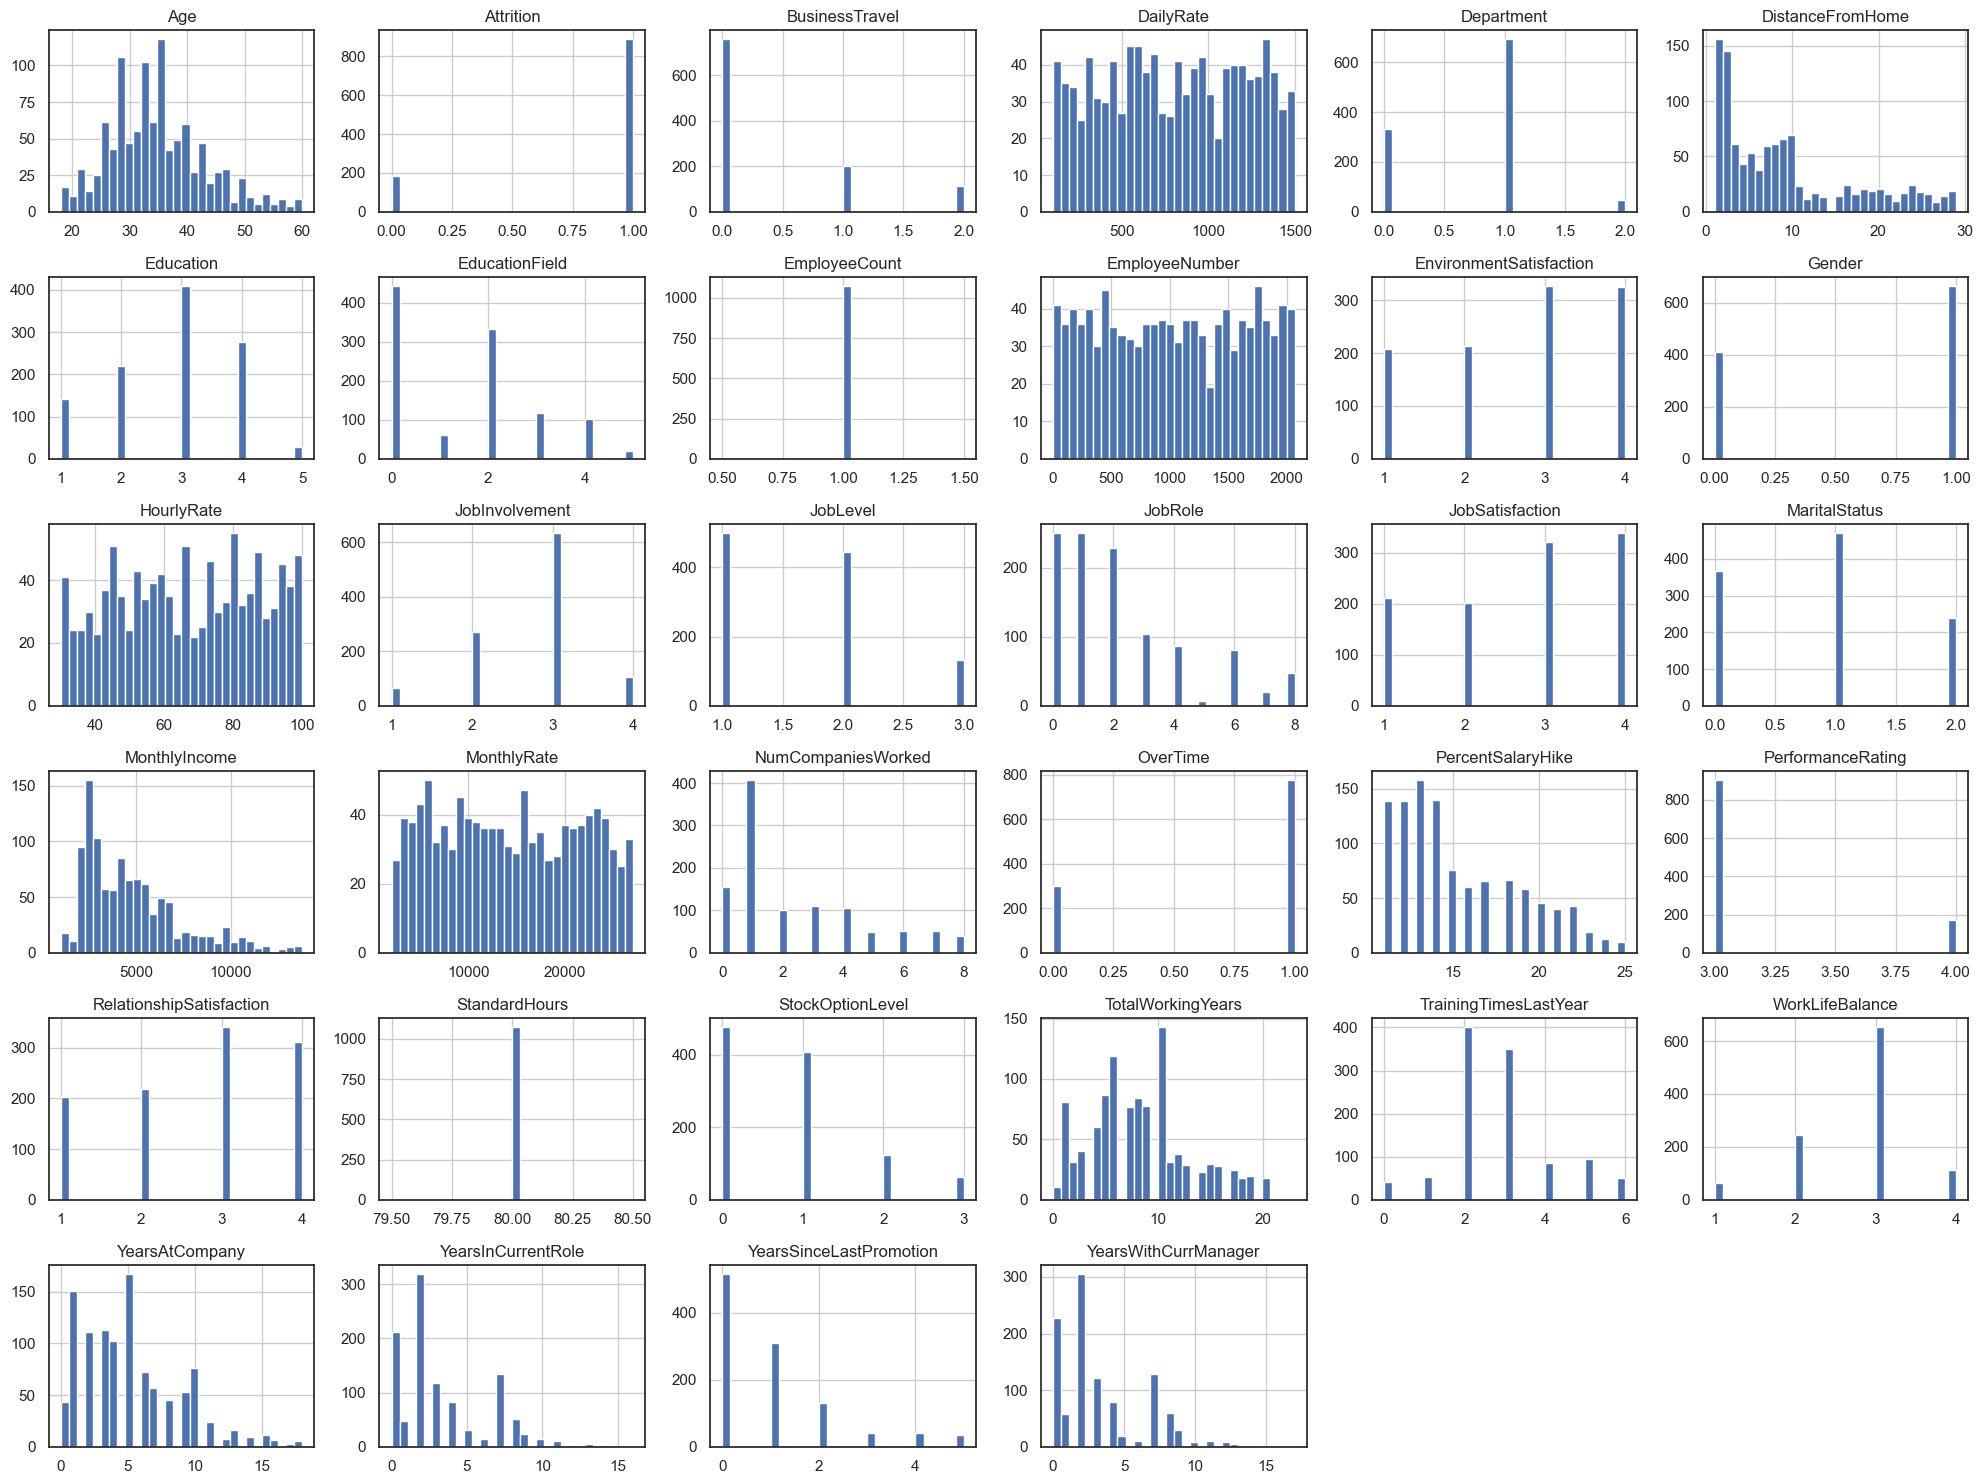

In [847]:
df.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

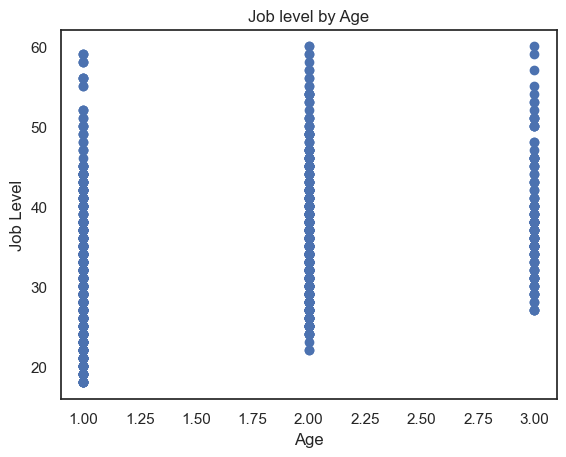

In [848]:
plt.scatter(df['JobLevel'], df['Age'],  marker="o", picker=True)
plt.title(f'Job level by Age')
plt.xlabel('Age')
plt.ylabel('Job Level')
plt.show()

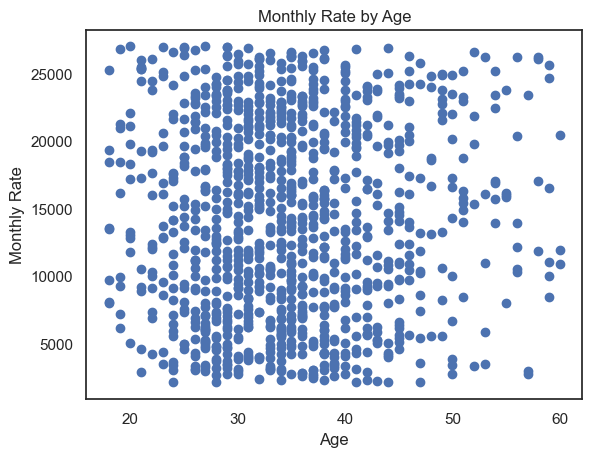

In [849]:
plt.scatter(df['Age'], df['MonthlyRate'],  marker="o", picker=True)
plt.title(f'Monthly Rate by Age')
plt.xlabel('Age')
plt.ylabel('Monthly Rate')
plt.show()

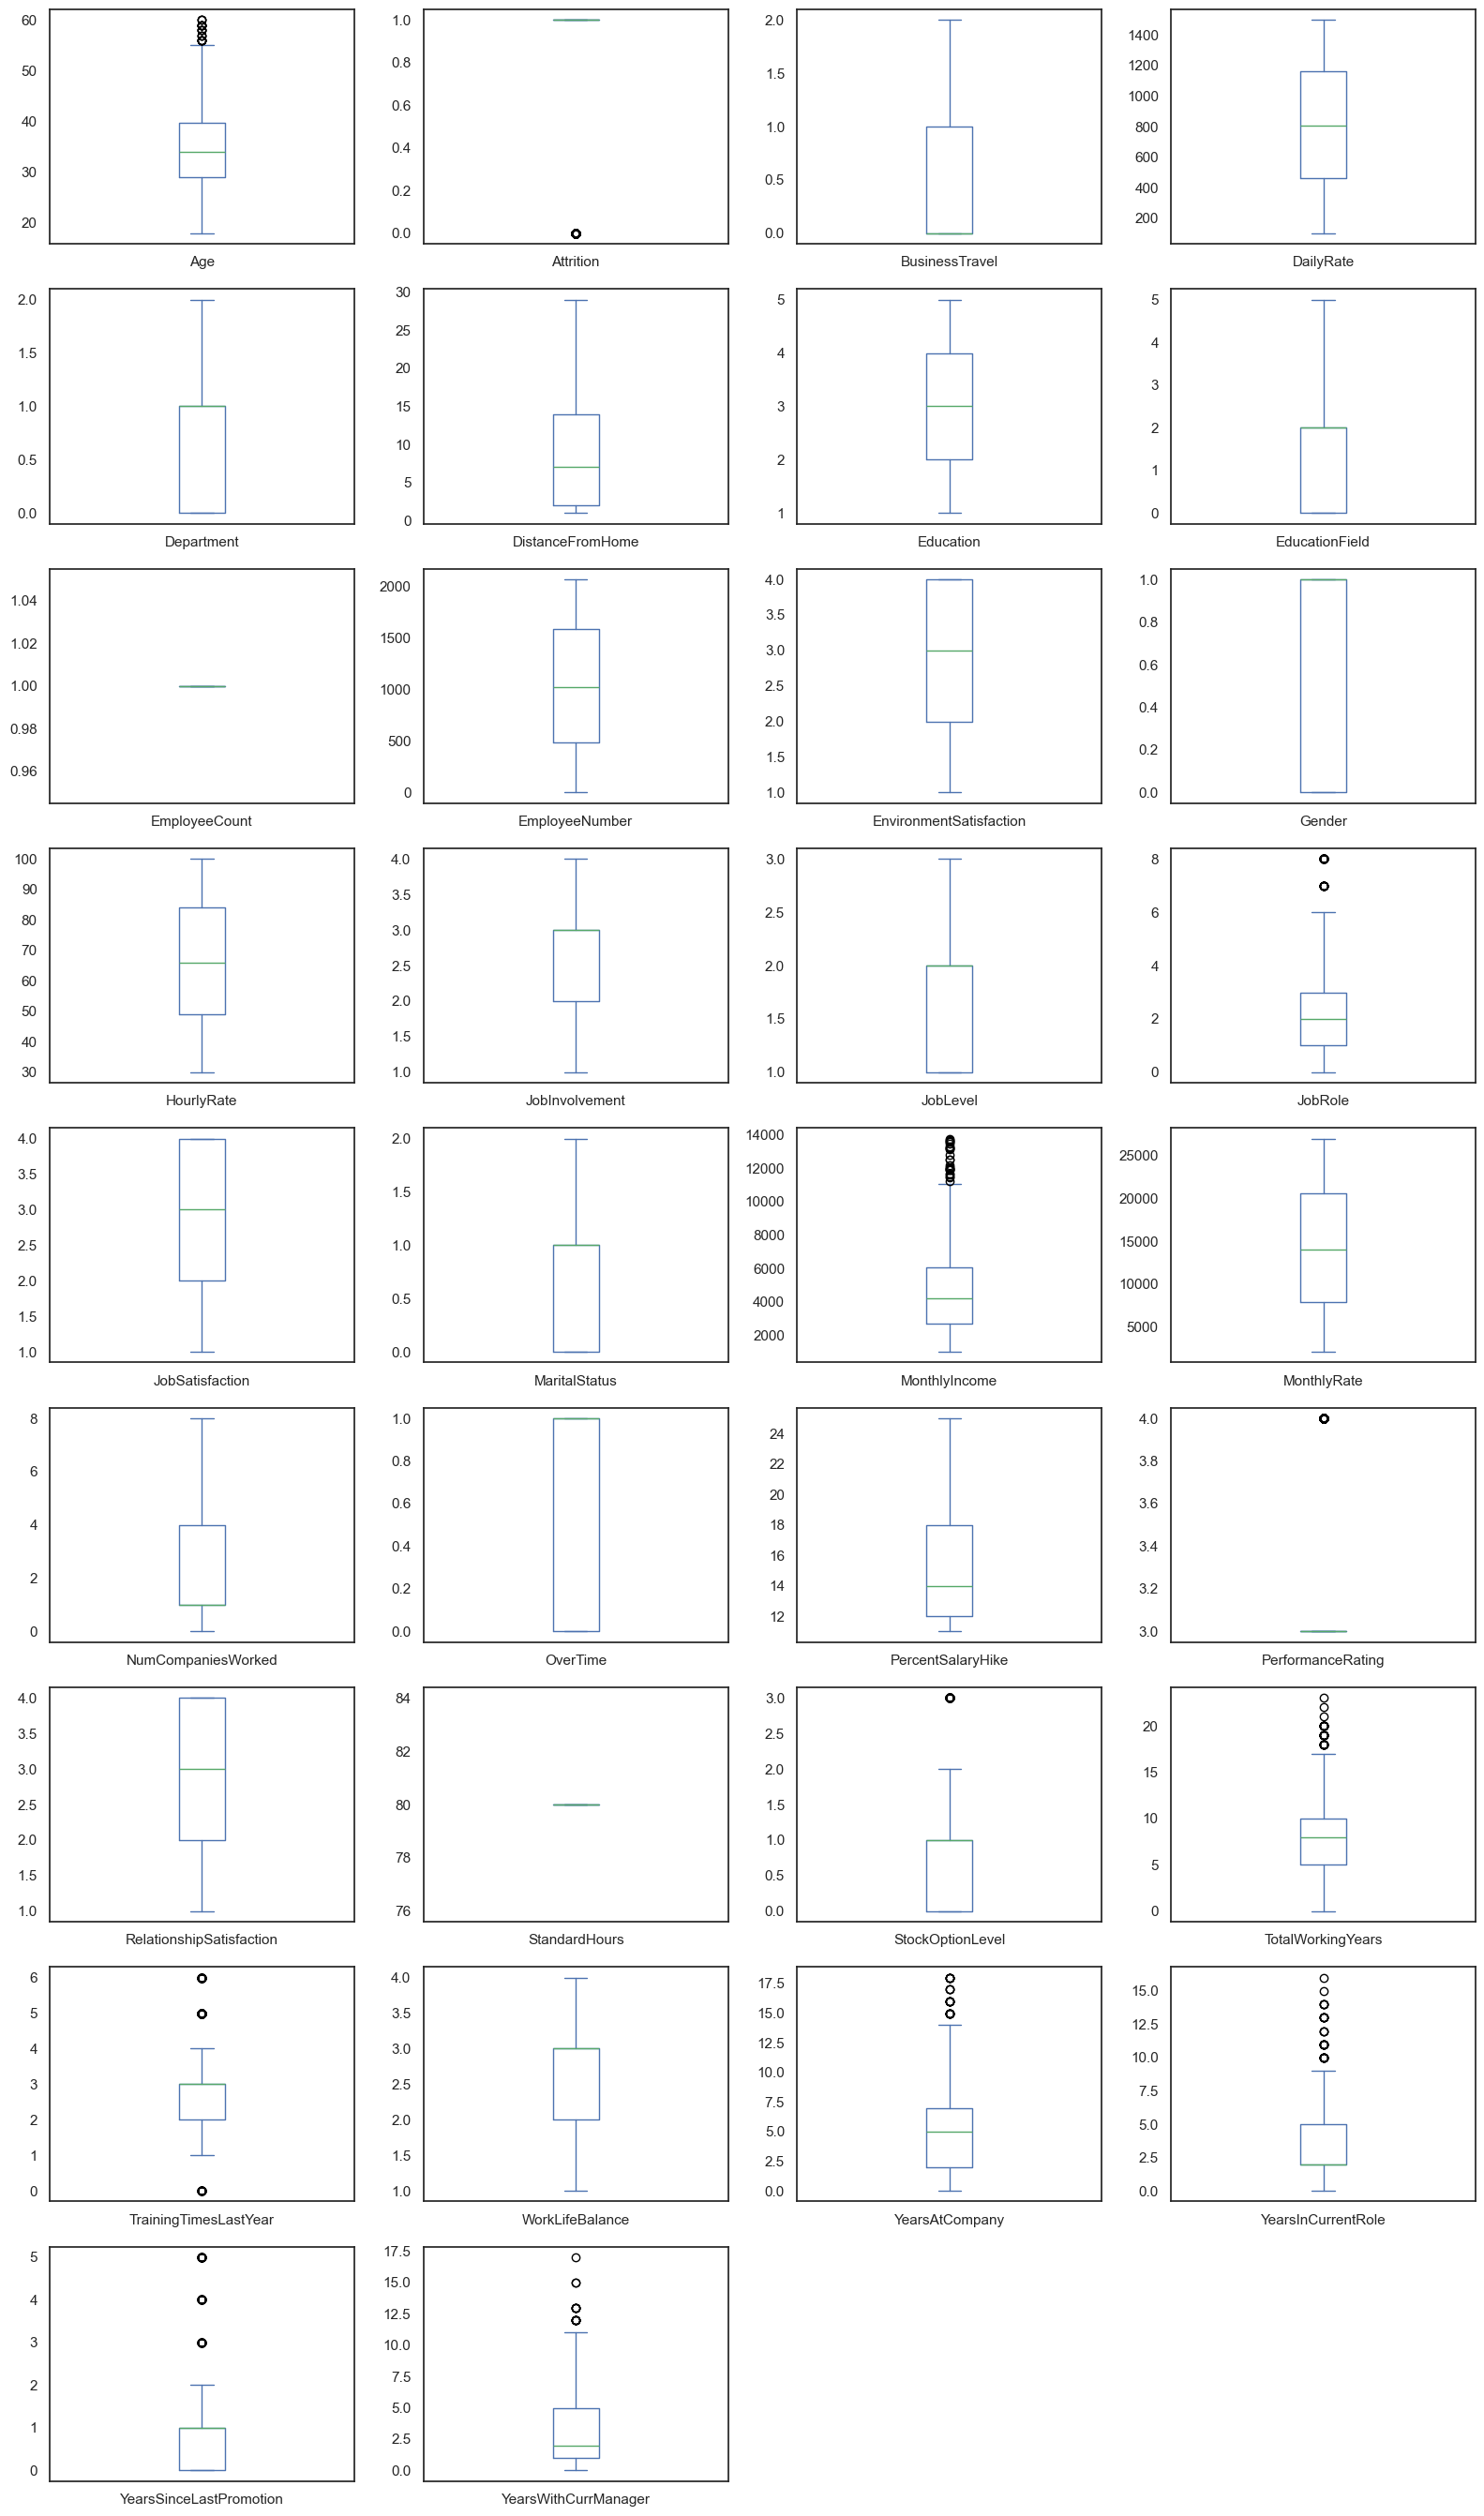

In [850]:
import math

num_columns = len(df.columns)
cols = 4
rows = math.ceil(num_columns / cols)

df.plot(kind='box', subplots=True, layout=(rows, cols), figsize=(4 * cols, 3 * rows), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


In [851]:
array = df.values

X, y = array[:, :-1], array[:, -1]

class0 = np.array(X[y==0])
class1 = np.array(X[y==1])
class2 = np.array(X[y==2])
class3 = np.array(X[y==3])
class4 = np.array(X[y==4])

In [852]:
set_prop = 0.2

seed = 7

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

In [853]:
params = {'max_depth': 5}
classifier = DecisionTreeClassifier(**params)
# classifier = RandomForestClassifier(n_estimators = 100, max_depth = 6)
 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [854]:
import graphviz
dot_df = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=df.columns[:33], class_names = True,        
                         filled=True, rounded=True, proportion = False,
                         special_characters=True) 

In [855]:
graph = graphviz.Source(dot_df)
graph.render("company") 

'company.pdf'

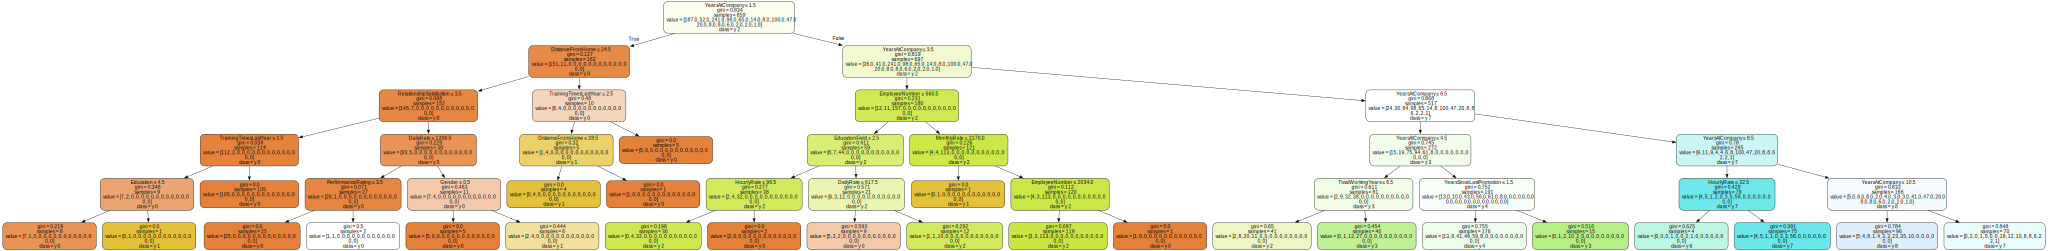

In [856]:
graph

In [857]:
# Set the metrics
scoring = 'accuracy'

In [858]:
# Predict the labels of the test df
y_testp = classifier.predict(X_test)
y_testp

array([0, 8, 2, 4, 0, 0, 8, 2, 8, 2, 0, 3, 0, 2, 3, 2, 7, 4, 7, 4, 0, 2,
       7, 2, 4, 0, 8, 7, 4, 8, 0, 3, 7, 2, 7, 0, 2, 2, 2, 8, 8, 4, 0, 7,
       4, 8, 4, 2, 8, 2, 3, 7, 2, 8, 2, 2, 4, 2, 2, 4, 4, 3, 8, 0, 3, 7,
       2, 3, 4, 4, 4, 4, 4, 7, 0, 8, 7, 3, 7, 2, 2, 7, 0, 3, 3, 2, 8, 2,
       8, 4, 2, 4, 0, 2, 7, 4, 4, 7, 4, 8, 2, 4, 2, 4, 4, 2, 7, 7, 2, 8,
       8, 7, 7, 7, 4, 8, 3, 8, 0, 8, 7, 0, 8, 8, 7, 7, 2, 2, 0, 3, 7, 2,
       0, 4, 0, 3, 8, 1, 2, 4, 0, 0, 4, 2, 0, 4, 2, 0, 2, 7, 0, 0, 8, 2,
       2, 3, 7, 8, 2, 2, 2, 8, 7, 7, 8, 4, 4, 2, 7, 4, 4, 1, 2, 4, 4, 7,
       0, 4, 2, 8, 2, 2, 7, 8, 7, 2, 7, 4, 2, 4, 0, 8, 0, 8, 0, 2, 0, 8,
       2, 4, 7, 0, 6, 0, 8, 0, 7, 2, 4, 4, 2, 7, 4, 4, 0])

In [859]:
print ("Accuracy is ", accuracy_score(y_test,y_testp))

Accuracy is  0.5953488372093023


In [860]:
confusion_mat = confusion_matrix(y_test,y_testp)
confusion_mat

array([[30,  1,  2,  2,  2,  0,  0,  2,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  1,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 4,  0, 48,  3,  8,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  7, 15,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1, 12,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1, 19,  9,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 11,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  8,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0]])

In [861]:
confusion = pandas.crosstab(y_test,y_testp)
confusion

col_0,0,1,2,3,4,6,7,8
row_0,,,,,,,,
0,30,1,2,2,2,0,2,1
1,0,1,1,1,2,0,1,0
2,4,0,48,3,8,0,1,0
3,0,0,1,7,15,0,0,1
4,0,0,0,1,12,0,0,1
5,0,0,0,0,4,0,0,1
6,0,0,0,0,0,0,2,1
7,0,0,0,0,0,1,19,9
8,0,0,0,0,0,0,1,11


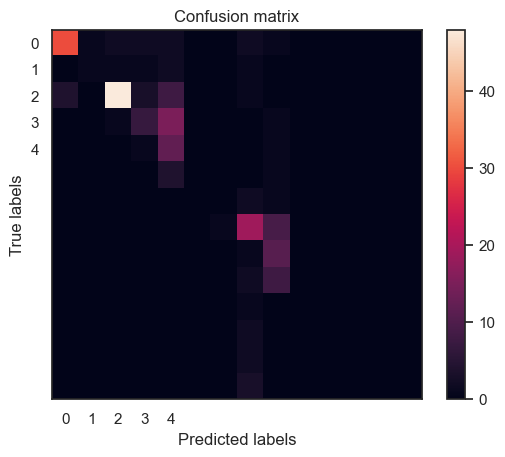

In [862]:
# Visualize confusion matrix
plt.imshow(confusion_mat, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

<Axes: >

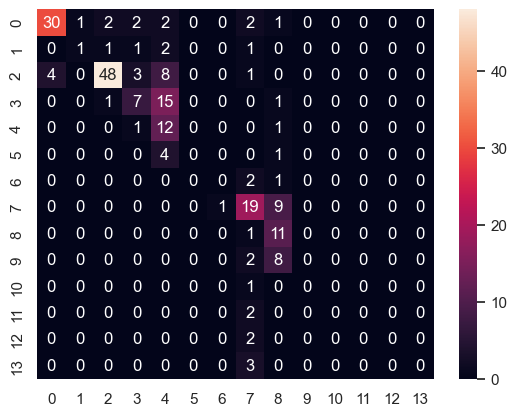

In [863]:
sns.heatmap(confusion_mat, annot=True)

In [864]:
labels = sorted(np.unique(y_train))
class_names = [f'Class{i}' for i in labels]

print(classification_report(
    y_train,
    classifier.predict(X_train),
    labels=labels,
    target_names=class_names,
    zero_division=0  
))

              precision    recall  f1-score   support

      Class0       0.96      0.84      0.90       187
      Class1       0.83      0.19      0.31        52
      Class2       0.84      0.73      0.78       241
      Class3       0.67      0.38      0.48        98
      Class4       0.34      0.91      0.49        65
      Class5       0.00      0.00      0.00        14
      Class6       0.50      0.25      0.33         8
      Class7       0.52      0.76      0.62       100
      Class8       0.36      0.74      0.49        47
      Class9       0.00      0.00      0.00        20
     Class10       0.00      0.00      0.00         8
     Class11       0.00      0.00      0.00         8
     Class12       0.00      0.00      0.00         6
     Class13       0.00      0.00      0.00         2
     Class15       0.00      0.00      0.00         2
     Class17       0.00      0.00      0.00         1

    accuracy                           0.64       859
   macro avg       0.31   

In [865]:
labels = sorted(np.unique(y_test))
class_names = [f'Class{i}' for i in labels]

print(classification_report(
    y_test,
    classifier.predict(X_test),
    labels=labels,
    target_names=class_names,
    zero_division=0  
))

              precision    recall  f1-score   support

      Class0       0.88      0.75      0.81        40
      Class1       0.50      0.17      0.25         6
      Class2       0.92      0.75      0.83        64
      Class3       0.50      0.29      0.37        24
      Class4       0.28      0.86      0.42        14
      Class5       0.00      0.00      0.00         5
      Class6       0.00      0.00      0.00         3
      Class7       0.53      0.66      0.58        29
      Class8       0.33      0.92      0.49        12
      Class9       0.00      0.00      0.00        10
     Class10       0.00      0.00      0.00         1
     Class11       0.00      0.00      0.00         2
     Class12       0.00      0.00      0.00         2
     Class13       0.00      0.00      0.00         3

    accuracy                           0.60       215
   macro avg       0.28      0.31      0.27       215
weighted avg       0.62      0.60      0.58       215



In [866]:
feature_cols = ['MonthlyIncome', 'HourlyRate', 'DailyRate']

X = df[feature_cols]

# print the first 5 rows
X.head()

,MonthlyIncome,HourlyRate,DailyRate
0,5993,94,1102
1,5130,61,279
2,2090,92,1373
3,2909,56,1392
5,3068,79,1005


In [867]:
y = df['YearsAtCompany']

# print the first 5 values
y.head()

0     6
1    10
2     0
3     8
5     7
Name: YearsAtCompany, dtype: int64

In [868]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(1074, 3)


In [869]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(1074,)


In [870]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [871]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(805, 3)
(805,)
(269, 3)
(269,)


In [872]:
y_test.head()

871     1
589     1
69      1
272     5
1376    5
Name: YearsAtCompany, dtype: int64

In [873]:
X_test.head()

,MonthlyIncome,HourlyRate,DailyRate
871,2210,97,984
589,2319,36,805
69,3388,79,318
272,2070,94,1158
1376,4771,71,1206


In [874]:
# create a model
linreg = LinearRegression()

# fit the model to our training df
linreg.fit(X_train, y_train)

LinearRegression()

In [875]:
print('b0 =', linreg.intercept_)
print('bi =', linreg.coef_)

b0 = 2.4471153568590966
bi = [ 5.68560812e-04  1.18604784e-03 -8.27920960e-05]


In [876]:
list(zip(feature_cols, linreg.coef_))

[('MonthlyIncome', np.float64(0.0005685608122063914)),
 ('HourlyRate', np.float64(0.0011860478411251174)),
 ('DailyRate', np.float64(-8.279209597894196e-05))]

In [877]:
y_test.head()

871     1
589     1
69      1
272     5
1376    5
Name: YearsAtCompany, dtype: int64

In [878]:
y_predicted = linreg.predict(X_test)

In [879]:
y_predicted

array([ 3.73721397,  3.74165797,  4.44076928,  3.63965149,  5.14408112,
        4.10521929,  3.63476405,  8.50000519,  4.07859817,  6.09729358,
        4.7483233 ,  5.08562515,  4.47845055,  3.81332872,  5.92435569,
        4.80782541,  3.60408932,  3.73236529,  6.24125385,  8.06964527,
        6.11350886,  4.04803243,  3.8121463 ,  3.22858052,  7.66045727,
        4.27213388,  4.31485203,  3.97381627,  3.62597395,  3.88432495,
        3.64925919,  7.63880623,  6.46869959,  5.14768845,  3.70138146,
        6.33525057,  5.25561397,  4.54605028,  5.44452656,  5.57901142,
        5.36980093,  3.93095981,  3.99396702,  6.15593007,  6.33185089,
        4.88448673,  3.65367617, 10.3159904 ,  3.97915632,  4.88791318,
        6.28822048,  4.75425994,  6.66141974,  4.97411086,  4.08975917,
        3.96108099,  4.99545541,  5.35625185,  6.12610311,  3.87969164,
        3.62205233,  3.37717172,  5.92798268,  5.01954055,  4.56197058,
        5.33811926,  6.03308649,  6.82184523,  7.36996543,  4.94

In [880]:
from sklearn import metrics

In [881]:
print(metrics.mean_absolute_error(y_test, y_predicted))

2.8228003056003645


In [882]:
print(metrics.mean_squared_error(y_test, y_predicted))

12.311666350497113


In [883]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

3.508798419758125


In [884]:
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

Explained variance score  0.06


In [885]:
r2_score(y_test, y_predicted)

0.06243213192446129

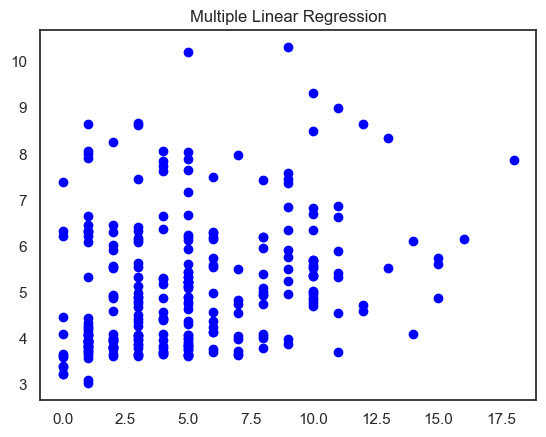

In [886]:
# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')
plt.show()